In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import pandas as pd

In [19]:
data=pd.read_csv('Laptop_price.csv')
data

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [20]:
data.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [21]:
data.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [38]:
corr=data.corr()
print(corr)

                     Brand  Processor_Speed  RAM_Size  Storage_Capacity  \
Brand             1.000000        -0.006958  0.013622         -0.008166   
Processor_Speed  -0.006958         1.000000  0.021391         -0.067576   
RAM_Size          0.013622         0.021391  1.000000          0.002111   
Storage_Capacity -0.008166        -0.067576  0.002111          1.000000   
Screen_Size      -0.031384        -0.013425 -0.036002         -0.027560   
Weight           -0.022911        -0.054603 -0.025382          0.041335   
Price            -0.008365        -0.050737  0.061237          0.997908   

                  Screen_Size    Weight     Price  
Brand               -0.031384 -0.022911 -0.008365  
Processor_Speed     -0.013425 -0.054603 -0.050737  
RAM_Size            -0.036002 -0.025382  0.061237  
Storage_Capacity    -0.027560  0.041335  0.997908  
Screen_Size          1.000000  0.021995 -0.026740  
Weight               0.021995  1.000000  0.038417  
Price               -0.026740  0.03

<Axes: >

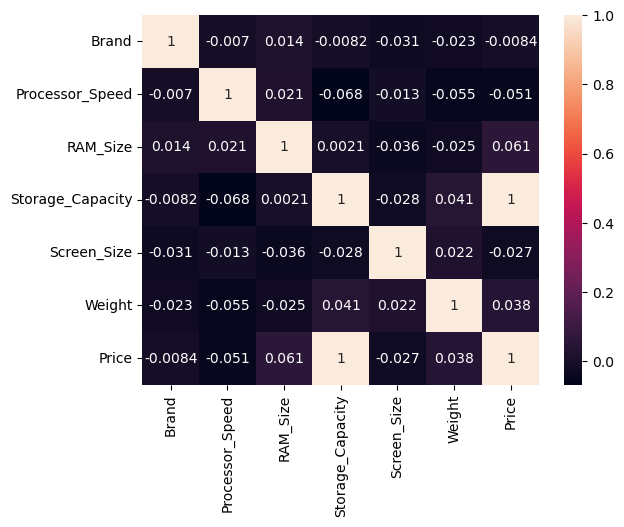

In [39]:
sns.heatmap(corr,annot=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
b=['Brand']
for i in b:
        data[i]=a.fit_transform(data[i])
data

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093065
1,0,2.912833,4,1000,11.311372,3.260012,31607.605919
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,0,3.806248,16,512,12.280360,4.573865,17436.728334
4,0,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,3,3.343584,4,1000,12.587095,3.162399,31593.668017
996,2,2.780555,8,256,12.679356,3.750265,9149.521832
997,2,3.200569,4,512,12.666315,3.392612,16552.404779
998,1,1.604182,8,256,11.215581,3.857613,9407.473459


In [23]:
data['Brand'].unique()

array([1, 0, 4, 3, 2])

In [24]:
x=data.drop(['Price'],axis=1)
print(x)

     Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight
0        1         3.830296        16               512    11.185147  2.641094
1        0         2.912833         4              1000    11.311372  3.260012
2        4         3.241627         4               256    11.853023  2.029061
3        0         3.806248        16               512    12.280360  4.573865
4        0         3.268097        32              1000    14.990877  4.193472
..     ...              ...       ...               ...          ...       ...
995      3         3.343584         4              1000    12.587095  3.162399
996      2         2.780555         8               256    12.679356  3.750265
997      2         3.200569         4               512    12.666315  3.392612
998      1         1.604182         8               256    11.215581  3.857613
999      4         1.711980         4               256    16.561498  3.440883

[1000 rows x 6 columns]


In [25]:
y=data['Price']
print(y)

0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           ...     
995    31593.668017
996     9149.521832
997    16552.404779
998     9407.473459
999     8807.696702
Name: Price, Length: 1000, dtype: float64


In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [27]:
from sklearn.tree import DecisionTreeRegressor
reg2=DecisionTreeRegressor()
reg2.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [28]:
accuracy=reg2.score(xtest,ytest)*100
print(accuracy)

99.90255089856845


In [29]:
predict=reg2.score(xtrain,ytrain)*100
print(predict)

100.0


In [32]:
v=[[1,3.830296,16,512,11.185147,2.641094]]
out=reg2.predict(v)
print(out)

[17641.59996297]


C:\Users\aneet\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

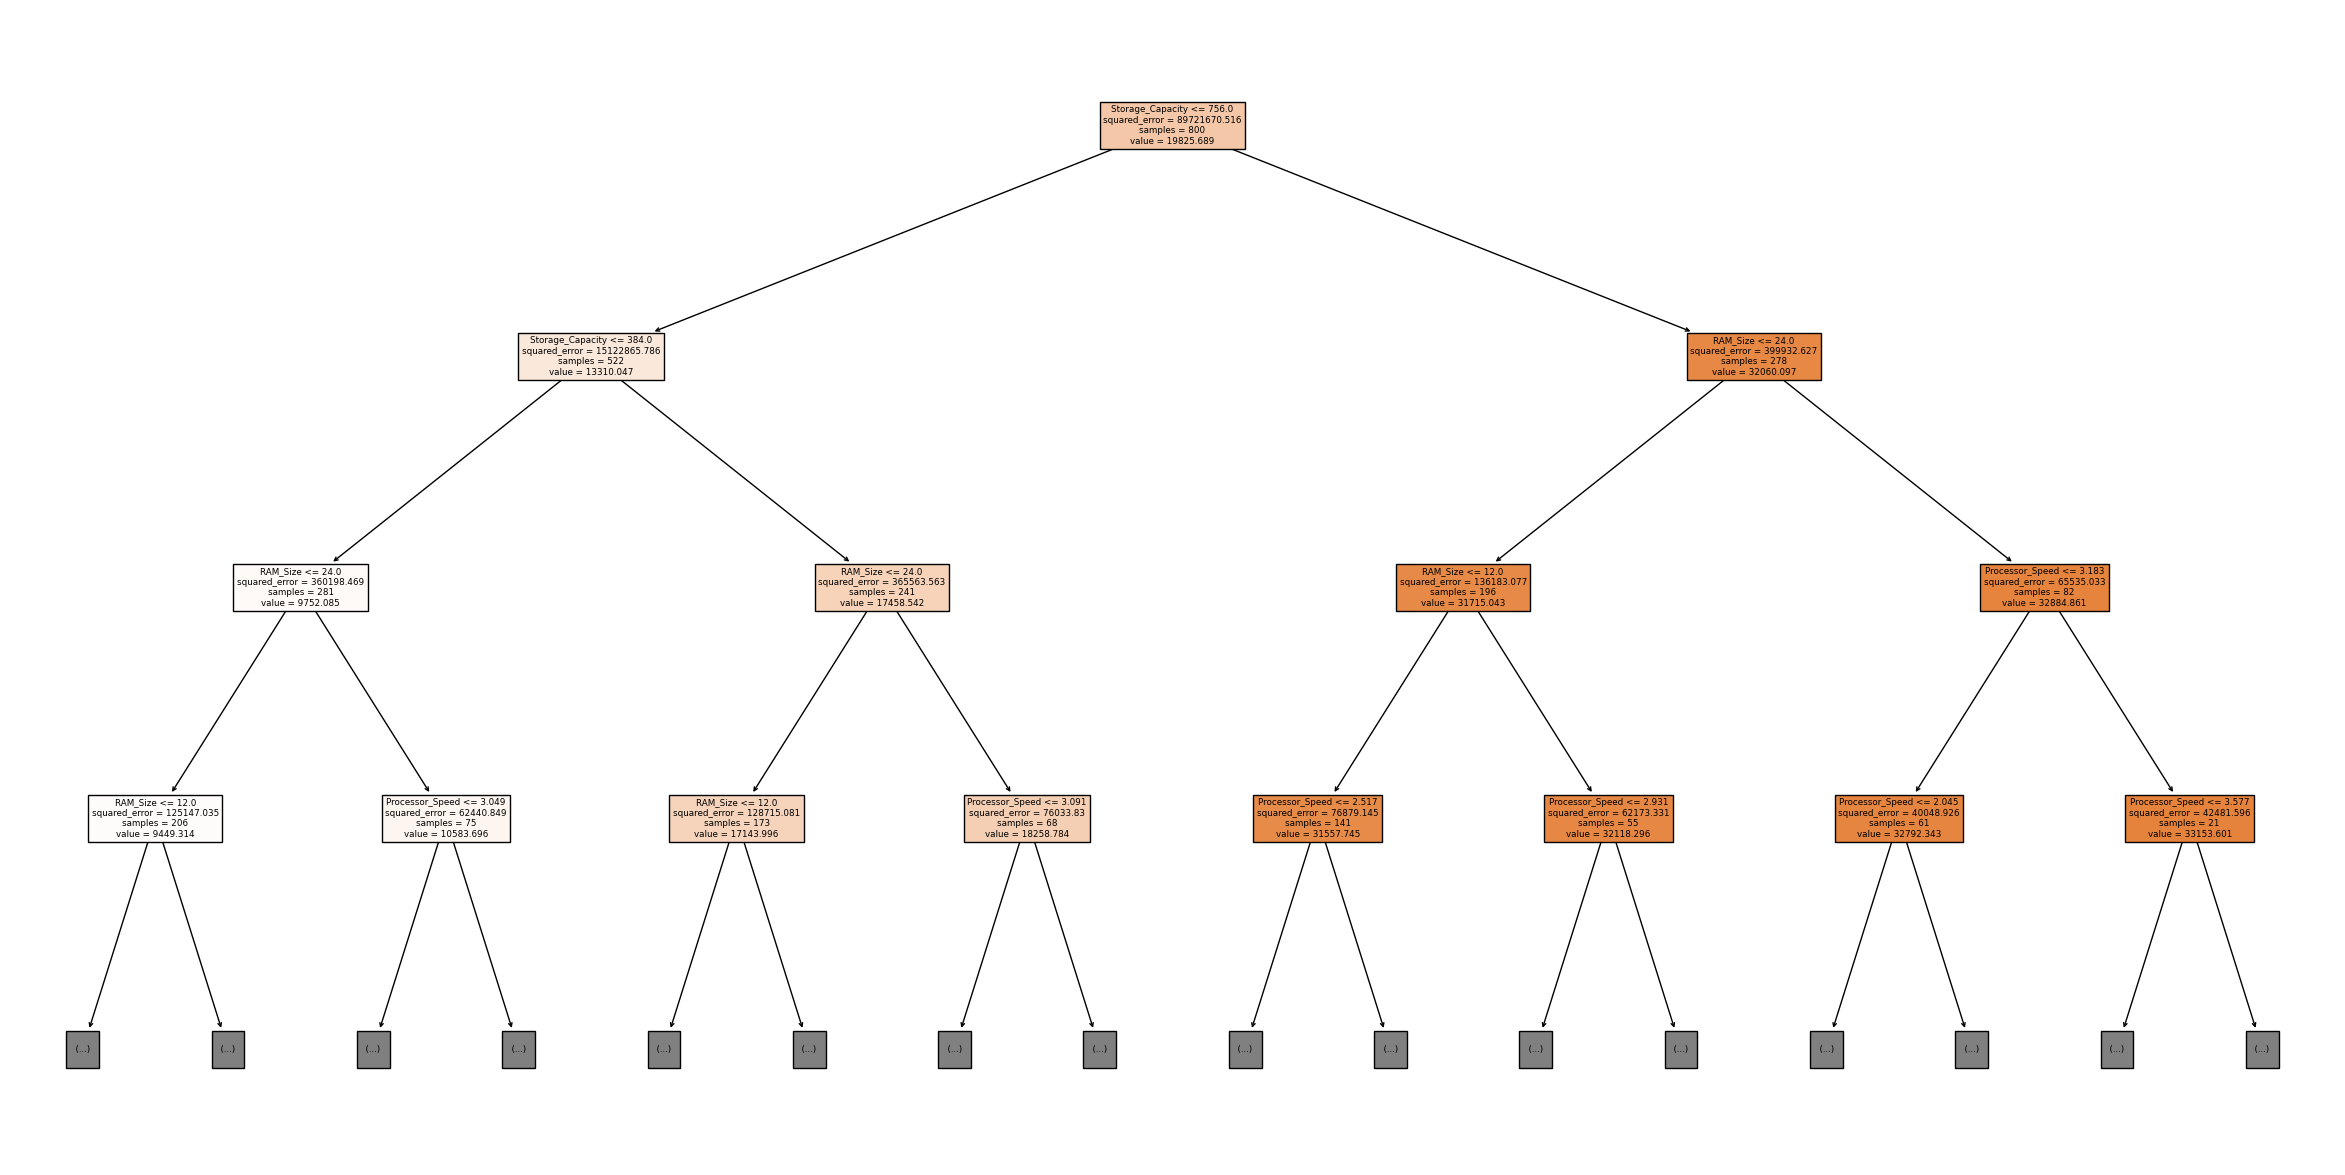

In [42]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(30,15))
tree.plot_tree(reg2,feature_names=x.columns.tolist(),filled=True,max_depth=3)
plt.show

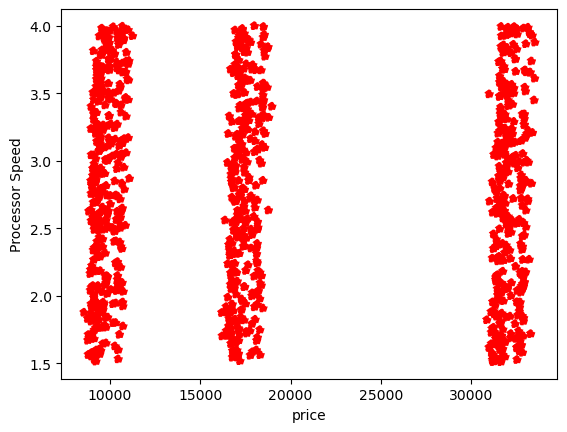

In [69]:
x1=data['Price']
y1=data['Processor_Speed']
plt.xlabel('price')
plt.ylabel('Processor Speed')
plt.scatter(x1,y1,linestyle='--',marker='p',c='red')

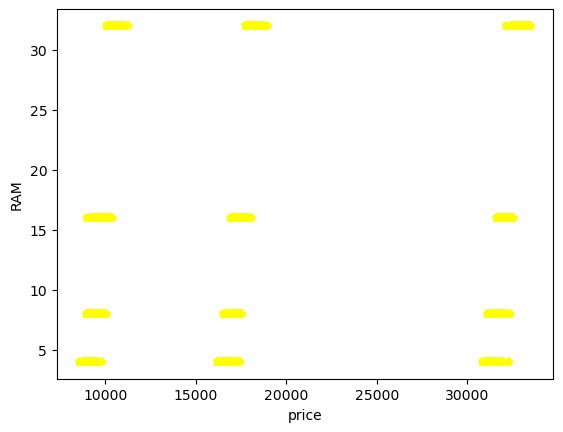

In [68]:
x2=data['Price']
y2=data['RAM_Size']
plt.xlabel('price')
plt.ylabel('RAM')
plt.scatter(x2,y2,linestyle='--',marker='p',c='yellow')



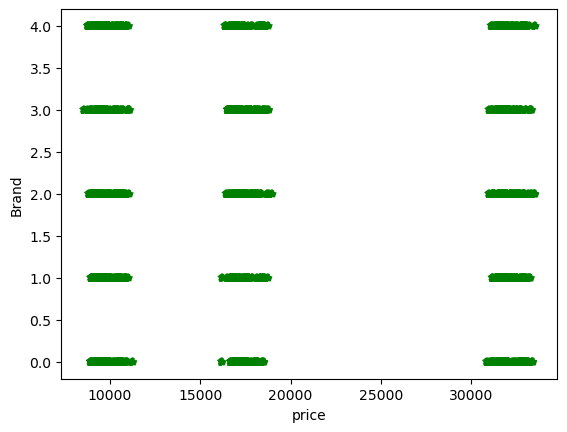

In [70]:
x3=data['Price']
y3=data['Brand']
plt.xlabel('price')
plt.ylabel('Brand')
plt.scatter(x3,y3,linestyle='--',marker='p',c='green')



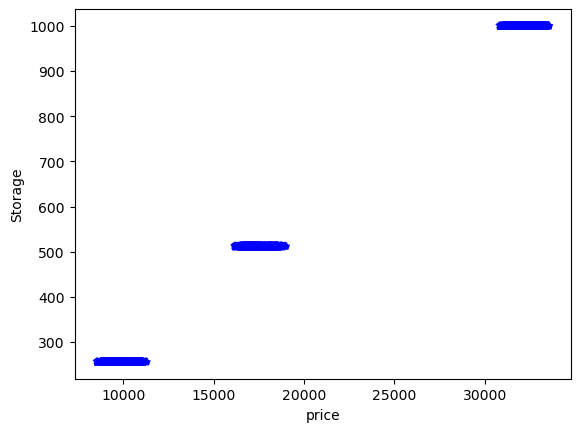

In [71]:
x4=data['Price']
y4=data['Storage_Capacity']
plt.xlabel('price')
plt.ylabel('Storage')
plt.scatter(x4,y4,linestyle='--',marker='p',c='blue')
